# Formatting the Data + Analysis

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math

In [0]:
data_source_url = "https://raw.githubusercontent.com/SRugina/team8-impyute-code/master/Meteorite_Landings.csv"
meteor_landings = pd.read_csv(data_source_url)
# prepare the imputed variable
meteor_landings_imputed = pd.read_csv(data_source_url)

In [404]:
meteor_landings.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,NaN,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 00:00,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 00:00,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 00:00,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 00:00,-33.16667,-64.95000,"(-33.16667, -64.95)"


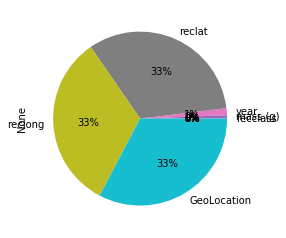

In [405]:
# replace Unkown values with NaN so we can remove it eaisly
meteor_landings["recclass"] = meteor_landings["recclass"].replace("Unknown", np.NaN)

# how many values aren't known as percentage
meteor_landings.isnull().sum().plot(kind='pie', autopct='%1.0f%%')

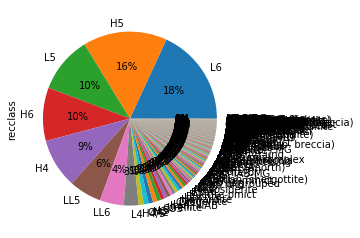

In [406]:
threshold = 350 # Anything that occurs less than this will be removed.
vc = meteor_landings["recclass"].value_counts()

# all the possible labels
vc.plot(kind='pie', autopct='%1.0f%%')

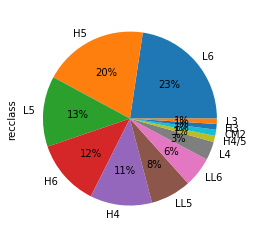

In [407]:
to_remove = vc[vc <= threshold].index
meteor_landings["recclass"].replace(to_remove, np.nan, inplace=True)

# the top 9 labels
meteor_landings["recclass"].value_counts().plot(kind='pie', autopct='%1.0f%%') # top 9

In [408]:
# do the same thing for the imputed variable, replacing rarely used classes with NaN

meteor_landings_imputed["recclass"] = meteor_landings_imputed["recclass"].replace("Unknown", np.NaN)
threshold = 350 # Anything that occurs less than this will be removed.
vc = meteor_landings_imputed["recclass"].value_counts()

to_remove = vc[vc <= threshold].index
meteor_landings_imputed["recclass"].replace(to_remove, np.nan, inplace=True)

print(meteor_landings_imputed["recclass"].value_counts()) # top 9

L6      8285
H5      7142
L5      4796
H6      4528
H4      4211
LL5     2766
LL6     2043
L4      1253
H4/5     428
CM2      416
H3       386
L3       365
Name: recclass, dtype: int64


In [409]:
# remove these nan values from classes

meteor_landings_imputed.dropna(inplace=True)
meteor_landings_imputed.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 00:00,56.18333,10.23333,"(56.18333, 10.23333)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 00:00,-33.16667,-64.95000,"(-33.16667, -64.95)"
7,Agen,392,Valid,H5,30000.0,Fell,01/01/1814 12:00:00 AM,44.21667,0.61667,"(44.21667, 0.61667)"
8,Aguada,398,Valid,L6,1620.0,Fell,01/01/1930 00:00,-31.60000,-65.23333,"(-31.6, -65.23333)"
11,Aïr,424,Valid,L6,24000.0,Fell,01/01/1925 00:00,19.08333,8.38333,"(19.08333, 8.38333)"


# Impute Values

In [410]:


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

temp_imputed = meteor_landings_imputed.copy()

temp_imputed.drop('fall', axis=1, inplace=True)
temp_imputed.drop('year', axis=1, inplace=True)
temp_imputed.drop('name', axis=1, inplace=True)
temp_imputed.drop('id', axis=1, inplace=True)
temp_imputed.drop('nametype', axis=1, inplace=True)
temp_imputed.drop('recclass', axis=1, inplace=True)
temp_imputed.drop('GeoLocation', axis=1, inplace=True)

imp.fit(temp_imputed)

data = np.round(imp.transform(temp_imputed))

print(data)

meteor_landings_imputed = pd.DataFrame({'recclass': meteor_landings_imputed['recclass'],'mass (g)': data[:, 0], 'reclat': data[:, 1], 'reclong': data[:, 2]})

meteor_landings_imputed.head()

[[ 7.200e+02  5.600e+01  1.000e+01]
 [ 7.800e+02 -3.300e+01 -6.500e+01]
 [ 3.000e+04  4.400e+01  1.000e+00]
 ...
 [ 1.475e+03  2.900e+01  1.700e+01]
 [ 3.000e+00  4.900e+01  1.800e+01]
 [ 2.167e+03  5.000e+01  4.200e+01]]


,recclass,mass (g),reclat,reclong
1,H6,720.0,56.0,10.0
4,L6,780.0,-33.0,-65.0
7,H5,30000.0,44.0,1.0
8,L6,1620.0,-32.0,-65.0
11,L6,24000.0,19.0,8.0


In [411]:
print(meteor_landings.shape)
# drop rows with missing values
meteor_landings.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(meteor_landings.shape)

(45716, 10)
(30907, 10)


In [412]:
meteor_landings.drop('fall', axis=1, inplace=True)
meteor_landings.drop('year', axis=1, inplace=True)
meteor_landings.drop('name', axis=1, inplace=True)
meteor_landings.drop('id', axis=1, inplace=True)
meteor_landings.drop('nametype', axis=1, inplace=True)
meteor_landings.drop('GeoLocation', axis=1, inplace=True)
meteor_landings.head()

,recclass,mass (g),reclat,reclong
1,H6,720.0,56.18333,10.23333
4,L6,780.0,-33.16667,-64.95000
7,H5,30000.0,44.21667,0.61667
8,L6,1620.0,-31.60000,-65.23333
11,L6,24000.0,19.08333,8.38333


# Comparing with a ML Model on both sets of data

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [414]:

features1 = meteor_landings.iloc[:, 1:4].values
labels1 = meteor_landings.iloc[:, 0].values

print(features1)
print(labels1)

features2 = meteor_landings_imputed.iloc[:, 1:4].values
labels2 = meteor_landings_imputed.iloc[:, 0].values

print(features2)
print(labels2)

[[ 7.200000e+02  5.618333e+01  1.023333e+01]
 [ 7.800000e+02 -3.316667e+01 -6.495000e+01]
 [ 3.000000e+04  4.421667e+01  6.166700e-01]
 ...
 [ 1.475000e+03  2.903700e+01  1.701850e+01]
 [ 3.300000e+00  4.925000e+01  1.766667e+01]
 [ 2.167000e+03  4.978917e+01  4.150460e+01]]
['H6' 'L6' 'H5' ... 'L6' 'H4' 'L6']
[[ 7.200e+02  5.600e+01  1.000e+01]
 [ 7.800e+02 -3.300e+01 -6.500e+01]
 [ 3.000e+04  4.400e+01  1.000e+00]
 ...
 [ 1.475e+03  2.900e+01  1.700e+01]
 [ 3.000e+00  4.900e+01  1.800e+01]
 [ 2.167e+03  5.000e+01  4.200e+01]]
['H6' 'L6' 'H5' ... 'L6' 'H4' 'L6']


In [0]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(features1, labels1, test_size=0.2, random_state=0)

X2_train, X2_test, y2_train, y2_test = train_test_split(features2, labels2, test_size=0.2, random_state=0)

In [416]:
from sklearn.linear_model import LogisticRegression

LR1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X1_train, y1_train)
LR1.predict(X1_test)
res1 = round(LR1.score(X1_test,y1_test), 4)

LR2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X2_train, y2_train)
LR2.predict(X2_test)
res2 = round(LR2.score(X2_test,y2_test), 4)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


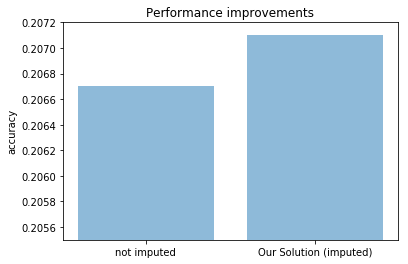

In [417]:
objects = ('not imputed', 'Our Solution (imputed)')
y_pos = np.arange(len(objects))
performance = [res1, res2]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylim([0.2055,0.2072])
plt.ylabel('accuracy')
plt.title('Performance improvements')

plt.show()

# Conclusion

Considering:

1. we only had 2 hours due to joining a team (which was missing half its members) at the last minute to help them

2. the very quickly-made logistic regression model was only about 20% accurate to begin with... so the difference our imputations made were hindered by this.

Overall: a successful proof of concept, as we consistently got a slight increase in accuracy.